# ***Lending Club Case Study***

In [1]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action="ignore")

## ***Data Understanding***

In [2]:
# lets read the "loan" dataset, and see few rows in dataset

loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# lets check the dimensions of the loan Dataset, it contains 111 columns and 39717 rows 

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# lets see all column members

loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
len(loan.index)

39717

## ***Data Cleaning***

In [7]:
# We can see many Columns in loan dataset are NA, data not available. lets remove those columns which are not usefull/ have no data

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
100*(loan.isnull().sum()/len(loan.index))

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [9]:
# find out missing columns which are having >90% missing data

data_missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(data_missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [10]:
len(data_missing_columns)

56

In [11]:
# lets drop these missing columns which do not have >90% data 

missing_columns = [
  "acc_open_past_24mths",
  "all_util",
  "annual_inc_joint",
  "avg_cur_bal",
  "bc_open_to_buy",
  "bc_util",
  "dti_joint",
  "il_util",
  "inq_fi",
  "inq_last_12m",
  "max_bal_bc",
  "mo_sin_old_il_acct",
  "mo_sin_old_rev_tl_op",
  "mo_sin_rcnt_rev_tl_op",
  "mo_sin_rcnt_tl",
  "mort_acc",
  "mths_since_last_major_derog",
  "mths_since_last_record",
  "mths_since_rcnt_il",
  "mths_since_recent_bc",
  "mths_since_recent_bc_dlq",
  "mths_since_recent_inq",
  "mths_since_recent_revol_delinq",
  "next_pymnt_d",
  "num_accts_ever_120_pd",
  "num_actv_bc_tl",
  "num_actv_rev_tl",
  "num_bc_sats",
  "num_bc_tl",
  "num_il_tl",
  "num_op_rev_tl",
  "num_rev_accts",
  "num_rev_tl_bal_gt_0",
  "num_sats",
  "num_tl_120dpd_2m",
  "num_tl_30dpd",
  "num_tl_90g_dpd_24m",
  "num_tl_op_past_12m",
  "open_acc_6m",
  "open_il_12m",
  "open_il_24m",
  "open_il_6m",
  "open_rv_12m",
  "open_rv_24m",
  "pct_tl_nvr_dlq",
  "percent_bc_gt_75",
  "tot_coll_amt",
  "tot_cur_bal",
  "tot_hi_cred_lim",
  "total_bal_ex_mort",
  "total_bal_il",
  "total_bc_limit",
  "total_cu_tl",
  "total_il_high_credit_limit",
  "total_rev_hi_lim",
  "verification_status_joint"
]
missing_columns

['acc_open_past_24mths',
 'all_util',
 'annual_inc_joint',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'dti_joint',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_il_6m',
 'open_rv_12m',
 'open_rv_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_coll_amt',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bal_il',
 'total_bc_l

In [12]:
loans_df = loan.drop(missing_columns, axis = 1)
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
loans_df.shape

(39717, 55)

In [14]:
# checking whether any rows in dataset have more than 5 missing values, there are 4 rows which have > 5 missing values 

len(loans_df[loans_df.isnull().sum(axis=1) > 5].index)

4

In [15]:
# lets fnd out which are those rows

loans_df[loans_df.isnull().sum(axis=1) > 5].index

Int64Index([39659, 39660, 39714, 39715], dtype='int64')

In [16]:
# Rows from numbers 39659, 39660, 39714, 39715 have >5 missing values in them, lets delete these rows

loans_df = loans_df.drop(loans_df.index[[39659, 39660, 39714, 39715]])

In [17]:
# lets verify for >5 missing values in rows in dataset

len(loans_df[loans_df.isnull().sum(axis=1) > 5].index)

0

In [18]:
loans_df.shape

(39713, 55)

We can segregate these 55 columns into two types of attributes: 1. *Consumer attributes* and 2. *Loan attributes*

**Consumer attributes**: 1. id, 2. member_id, 3. emp_title, 4. emp_length, 5. addr_state, 6. zip_code, 7. home_ownership, 8. annual_inc, 9. total_acc, 10. open_acc, 11. pub_rec, 12. earliest_cr_line, 13. inq_last_6mths, 14. dti, 15. delinq_2yrs, 16. tax_liens

**Loan attributes**: 1. acc_now_delinq, 2. application_type, 3. chargeoff_within_12_mths, 4. collection_recovery_fee, 5. collections_12_mths_ex_med, 6. delinq_amnt, 7. desc, 8. funded_amnt, 9. funded_amnt_inv, 10. grade, 11. initial_list_status, 12. installment, 13. int_rate, 14. issue_d, 15. last_credit_pull_d, 16. last_pymnt_amnt, 17. last_pymnt_d, 18. loan_amnt, 19. loan_status, 20. mths_since_last_delinq, 21. out_prncp, 22. out_prncp_inv, 23. policy_code, 24. pub_rec_bankruptcies, 25. purpose, 26. pymnt_plan, 27. recoveries, 28. revol_bal, 29. revol_util, 30. sub_grade, 31. term, 32. title, 33. total_pymnt, 34. total_pymnt_inv, 35. total_rec_int, 36. total_rec_late_fee, 37. total_rec_prncp, 38. url 39. verification_status


**Once we pick up unique identifier of Consumer from Consumer attributes and leave remaining and on further cleaning of Loan attributes** by getting rid of attributes like 'desc', 'url', 'sub_grade' we can use below resulted attributes only:
1.  member_id,
2. acc_now_delinq,
3. application_type,
4. chargeoff_within_12_mths,
5. collection_recovery_fee,
6. collections_12_mths_ex_med,
7. delinq_amnt,
8. funded_amnt, 
9. funded_amnt_inv,
10. grade,
11. initial_list_status,
12. installment,
13. int_rate,
14. issue_d,
15. last_credit_pull_d,
16. last_pymnt_amnt,
17. last_pymnt_d,
18. loan_amnt,
19. loan_status,
20. mths_since_last_delinq,
21. out_prncp,
22. out_prncp_inv,
23. policy_code,
24. pub_rec_bankruptcies,
25. purpose,
26. pymnt_plan,
27. recoveries,
28. revol_bal,
29. revol_util,
30. term,
31. title,
32. total_pymnt,
33. total_pymnt_inv,
34. total_rec_int,
35. total_rec_late_fee,
36. total_rec_prncp     and
37. verification_status

In [19]:
# lets drop Consumer attributes leaving only 'member_id' attribute

consumer_attributes = [
  "id",
  "emp_title",
  "emp_length",
  "addr_state",
  "zip_code",
  "home_ownership",
  "annual_inc",
  "total_acc",
  "open_acc",
  "pub_rec",
  "earliest_cr_line",
  "inq_last_6mths",
  "dti",
  "delinq_2yrs",
  "tax_liens"
]
consumer_attributes

['id',
 'emp_title',
 'emp_length',
 'addr_state',
 'zip_code',
 'home_ownership',
 'annual_inc',
 'total_acc',
 'open_acc',
 'pub_rec',
 'earliest_cr_line',
 'inq_last_6mths',
 'dti',
 'delinq_2yrs',
 'tax_liens']

In [20]:
loans_df = loans_df.drop(consumer_attributes, axis = 1)
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39713 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39713 non-null  int64  
 1   loan_amnt                   39713 non-null  int64  
 2   funded_amnt                 39713 non-null  int64  
 3   funded_amnt_inv             39713 non-null  float64
 4   term                        39713 non-null  object 
 5   int_rate                    39713 non-null  object 
 6   installment                 39713 non-null  float64
 7   grade                       39713 non-null  object 
 8   sub_grade                   39713 non-null  object 
 9   verification_status         39713 non-null  object 
 10  issue_d                     39713 non-null  object 
 11  loan_status                 39713 non-null  object 
 12  pymnt_plan                  39713 non-null  object 
 13  url                         397

In [21]:
loans_df.shape

(39713, 40)

In [22]:
# lets drop Loan attributes 'desc', 'url', 'sub_grade'

consumer_attributes = [
    "desc",
    "url",
    "sub_grade",
]
consumer_attributes

['desc', 'url', 'sub_grade']

In [23]:
loans_df = loans_df.drop(consumer_attributes, axis = 1)
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39713 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39713 non-null  int64  
 1   loan_amnt                   39713 non-null  int64  
 2   funded_amnt                 39713 non-null  int64  
 3   funded_amnt_inv             39713 non-null  float64
 4   term                        39713 non-null  object 
 5   int_rate                    39713 non-null  object 
 6   installment                 39713 non-null  float64
 7   grade                       39713 non-null  object 
 8   verification_status         39713 non-null  object 
 9   issue_d                     39713 non-null  object 
 10  loan_status                 39713 non-null  object 
 11  pymnt_plan                  39713 non-null  object 
 12  purpose                     39713 non-null  object 
 13  title                       397

## ***Data Analysis***

### Now, lets see the Deciding factors for loan approval:

For this, Consumers 'loan_status' has to be in 'Fully Paid' or in 'Charged Off' status, we can not determine a good Consumer if his/ her 'loan_status' is current (means Consumer is still paying back the Loan amont) and 'chargeoff_within_12_mths' attribute has to be 0

In [24]:
loans_df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39710     Fully Paid
39711     Fully Paid
39712     Fully Paid
39713     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39713, dtype: object

In [25]:
loans_df['loan_status'].value_counts()

Fully Paid     32946
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can observe most of the loans are Fully paid, the loans which have loan_status = Current are neither fully paid nor defaulted, lets 

In [26]:
loans_df = loans_df[loans_df['loan_status'] != 'Current']
loans_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,verification_status,issue_d,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,Verified,Dec-11,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,Source Verified,Dec-11,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,Not Verified,Dec-11,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,Source Verified,Dec-11,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,Source Verified,Dec-11,...,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [27]:
loans_df = loans_df[loans_df['chargeoff_within_12_mths'] == 0]
loans_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,verification_status,issue_d,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,Verified,Dec-11,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,Source Verified,Dec-11,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,Not Verified,Dec-11,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,Source Verified,Dec-11,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,Source Verified,Dec-11,...,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [28]:
loans_df.shape

(38521, 37)

In [29]:
loans_df_final = loans_df.reset_index()

In [30]:
loans_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38521 entries, 0 to 38520
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       38521 non-null  int64  
 1   member_id                   38521 non-null  int64  
 2   loan_amnt                   38521 non-null  int64  
 3   funded_amnt                 38521 non-null  int64  
 4   funded_amnt_inv             38521 non-null  float64
 5   term                        38521 non-null  object 
 6   int_rate                    38521 non-null  object 
 7   installment                 38521 non-null  float64
 8   grade                       38521 non-null  object 
 9   verification_status         38521 non-null  object 
 10  issue_d                     38521 non-null  object 
 11  loan_status                 38521 non-null  object 
 12  pymnt_plan                  38521 non-null  object 
 13  purpose                     385

## **Lets draft the plots for Univariate and Bivariate Analysis**



## ***Univariate Analysis - Histograms***

<Axes: xlabel='loan_amnt', ylabel='Count'>

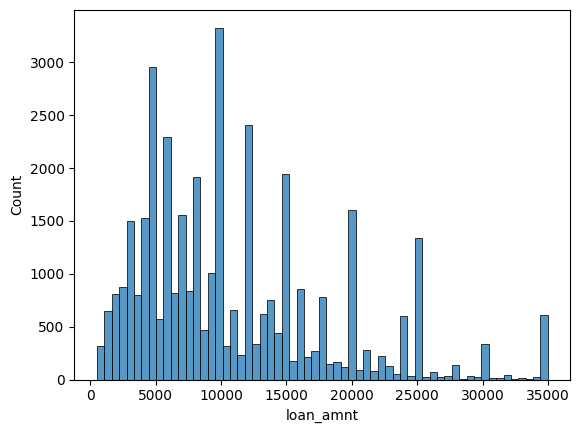

In [31]:
sns.histplot(loans_df_final["loan_amnt"])

<Axes: xlabel='funded_amnt', ylabel='Count'>

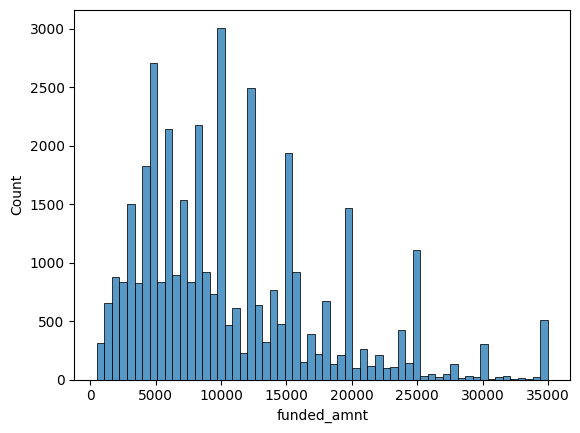

In [32]:
sns.histplot(loans_df_final["funded_amnt"])

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

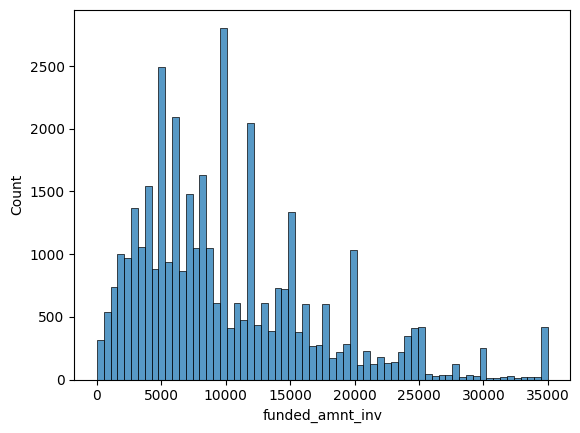

In [33]:
sns.histplot(loans_df_final["funded_amnt_inv"])

<Axes: xlabel='term', ylabel='Count'>

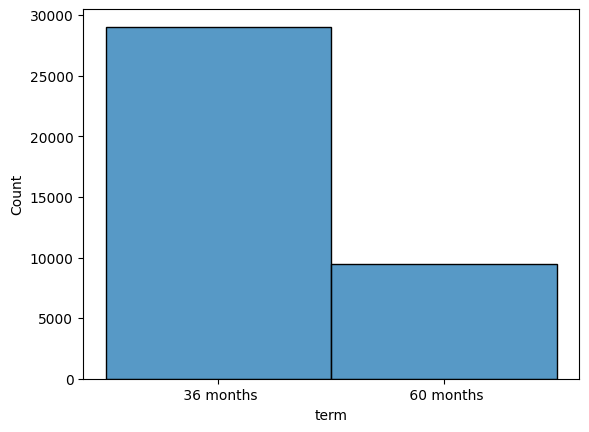

In [34]:
sns.histplot(loans_df_final["term"])

<Axes: xlabel='int_rate', ylabel='Count'>

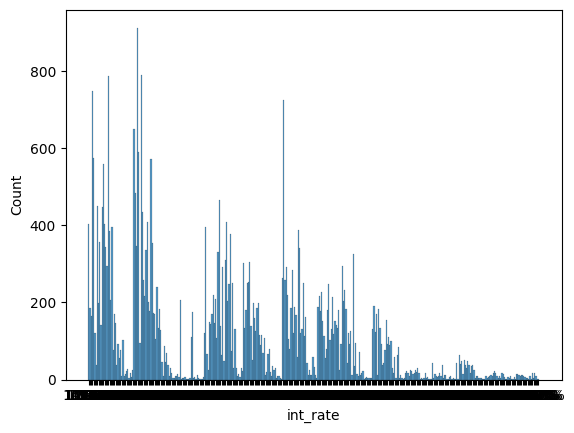

In [35]:
sns.histplot(loans_df_final["int_rate"], bins=[0,1,2,3,4,5]) #,10,15,20,25])

<Axes: xlabel='verification_status', ylabel='Count'>

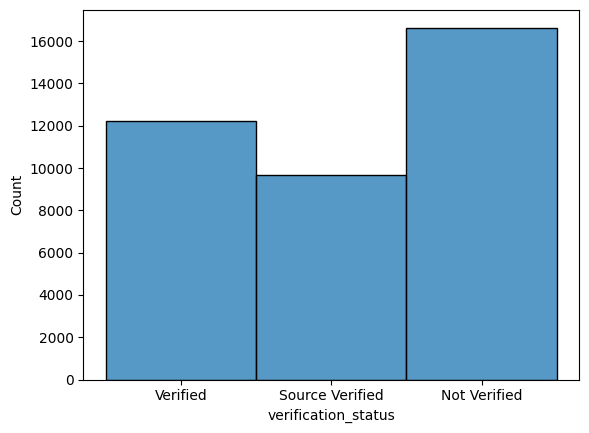

In [36]:
sns.histplot(loans_df_final["verification_status"])

<Axes: xlabel='loan_status', ylabel='Count'>

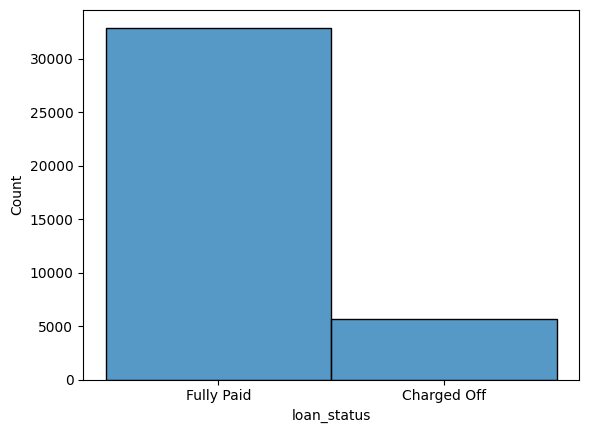

In [37]:
sns.histplot(loans_df_final["loan_status"])

In [38]:
cont_cols = [
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "verification_status", "loan_status"
]

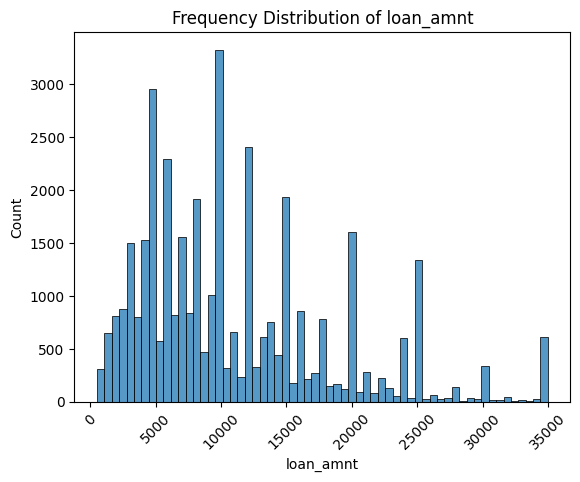

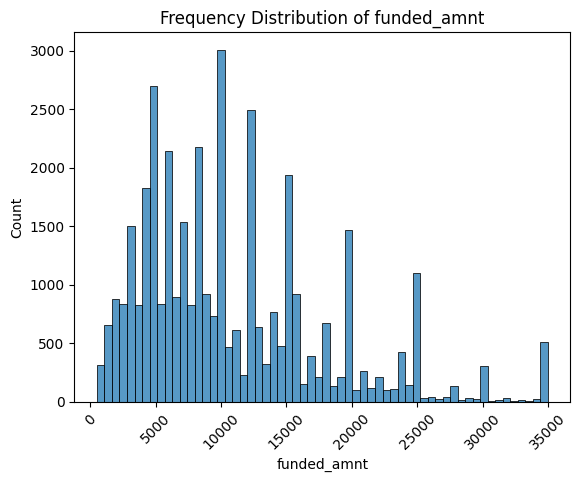

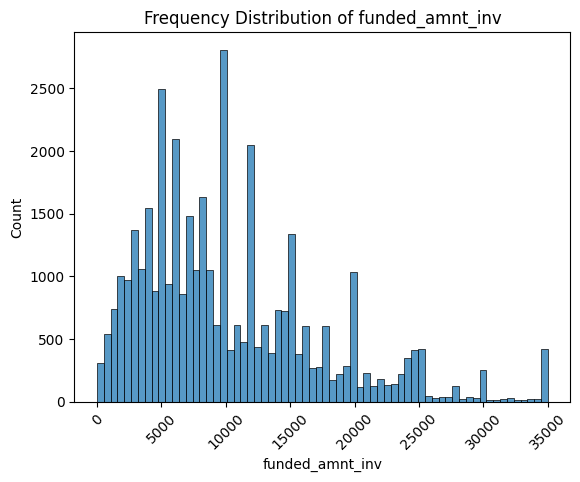

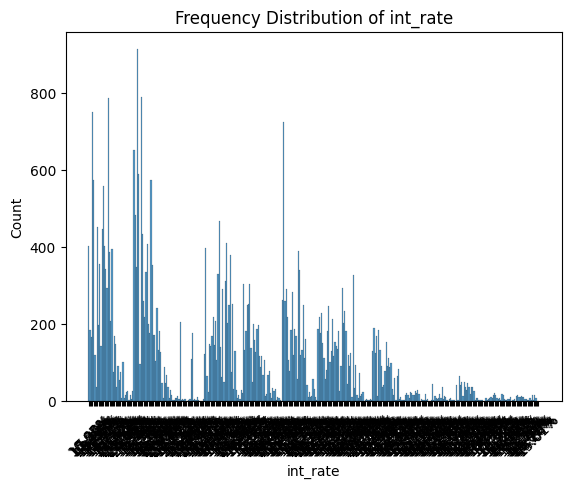

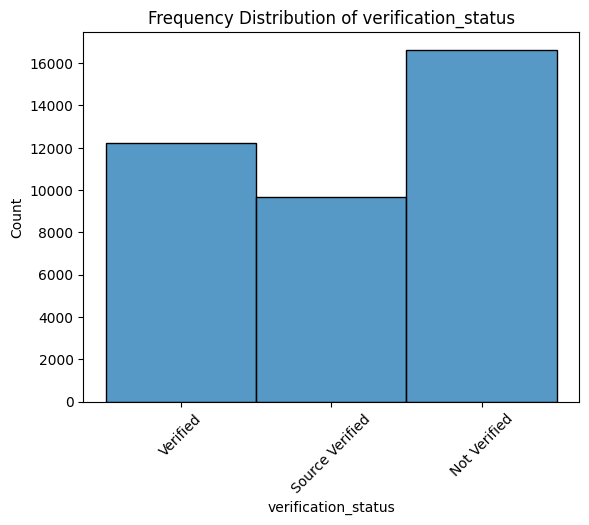

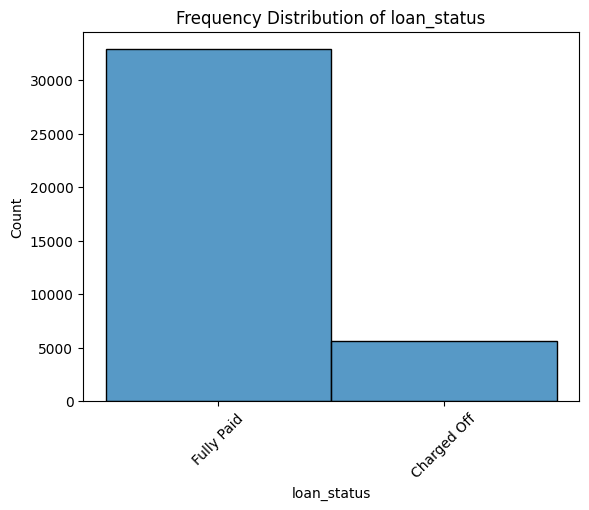

In [39]:
for i in cont_cols:
    sns.histplot(loans_df_final[i])
    plt.title("Frequency Distribution of "+i)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## ***Univariate Analysis - Boxplots***

<Axes: >

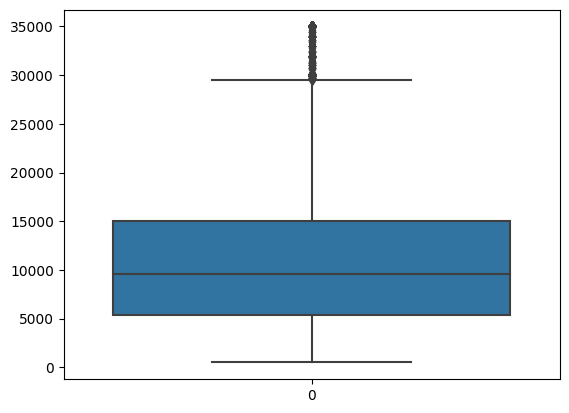

In [40]:
sns.boxplot(loans_df_final["loan_amnt"])

<Axes: >

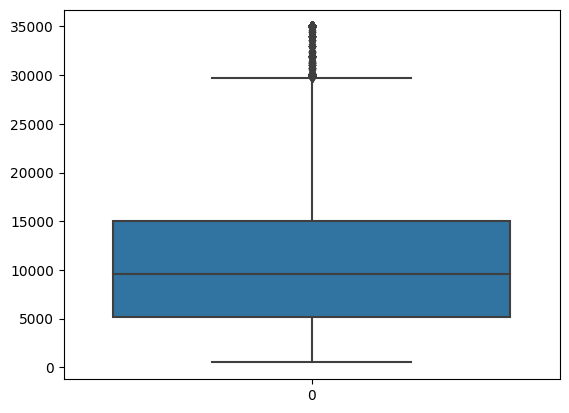

In [41]:
sns.boxplot(loans_df_final["funded_amnt"])

<Axes: >

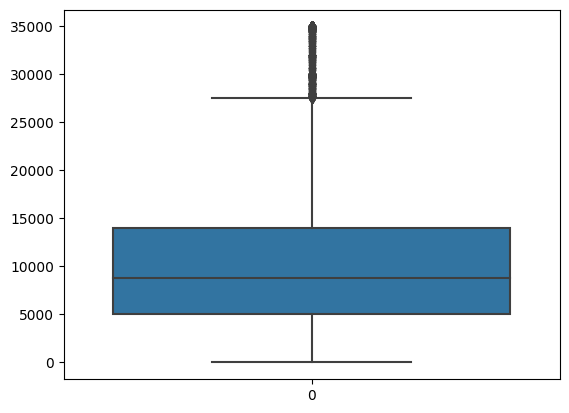

In [42]:
sns.boxplot(loans_df_final["funded_amnt_inv"])

## ***Recommendations***

### These 32,521 Consumers could be considered to provide loans.

In [43]:
loans_df_final

,index,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,verification_status,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,Verified,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,Source Verified,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,Not Verified,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,Source Verified,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,Source Verified,...,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38516,39661,121527,3000,3000,2225.0,36 months,7.75%,93.67,A,Not Verified,...,Apr-08,2563.55,Aug-07,0.0,1,INDIVIDUAL,0,0.0,0,NaN
38517,39662,121423,3000,3000,2975.0,36 months,7.75%,93.67,A,Not Verified,...,Apr-08,2563.59,Aug-07,0.0,1,INDIVIDUAL,0,0.0,0,NaN
38518,39663,120227,4000,4000,1475.0,36 months,10.91%,130.79,C,Not Verified,...,Aug-10,134.78,Jun-11,0.0,1,INDIVIDUAL,0,0.0,0,NaN
38519,39664,119635,2000,2000,475.0,36 months,8.70%,63.32,B,Not Verified,...,Aug-10,64.27,Aug-10,0.0,1,INDIVIDUAL,0,0.0,0,NaN
